The objective of this project was to gain hands-on experience building regression models in R and to explore the statistical features of the language. Throughout the project, we created multiple regression models, checked for the normality of residuals, and assessed homoscedasticity. Additionally, we used an instrumental variable to build a regression model that accounted for endogeneity. This project allowed us to develop a deeper understanding of the various techniques and tools available in R for regression analysis, and to gain valuable practical experience in applying them.

# Problem 1

## A

Estimating a model relating colGPA to hsGPA, ACT, skipped, and PC.

In [ ]:
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
library(readxl)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
OLS <- read_excel("/content/ColGPA_HW2.xls")

In [ ]:
print(head(OLS))

# A tibble: 6 × 5
  colGPA hsGPA   ACT    pc skipped
   <dbl> <dbl> <dbl> <dbl>   <dbl>
1    2.2   3      24     1       0
2    2.3   3.6    25     0       1
3    2.4   3      21     0       2
4    2.4   3      19     0       2
5    2.5   3.5    29     1       4
6    2.5   3      23     0       5


In [ ]:
model_1 <- lm(data = OLS, formula = colGPA ~ hsGPA + ACT + skipped + pc)

In [ ]:
summary(model_1)


Call:
lm(formula = colGPA ~ hsGPA + ACT + skipped + pc, data = OLS)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83963 -0.21622 -0.02502  0.26598  0.75055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.27084    0.34161   3.720 0.000297 ***
hsGPA        0.43670    0.09778   4.466 1.73e-05 ***
ACT          0.01395    0.01114   1.252 0.212918    
skipped     -0.07440    0.02716  -2.739 0.007036 ** 
pc           0.12396    0.06026   2.057 0.041687 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3319 on 128 degrees of freedom
Multiple R-squared:  0.2725,	Adjusted R-squared:  0.2498 
F-statistic: 11.99 on 4 and 128 DF,  p-value: 2.644e-08


Checking for normallity of the residuals.

In [ ]:
shapiro.test(model_1$residuals)


	Shapiro-Wilk normality test

data:  model_1$residuals
W = 0.99043, p-value = 0.4956


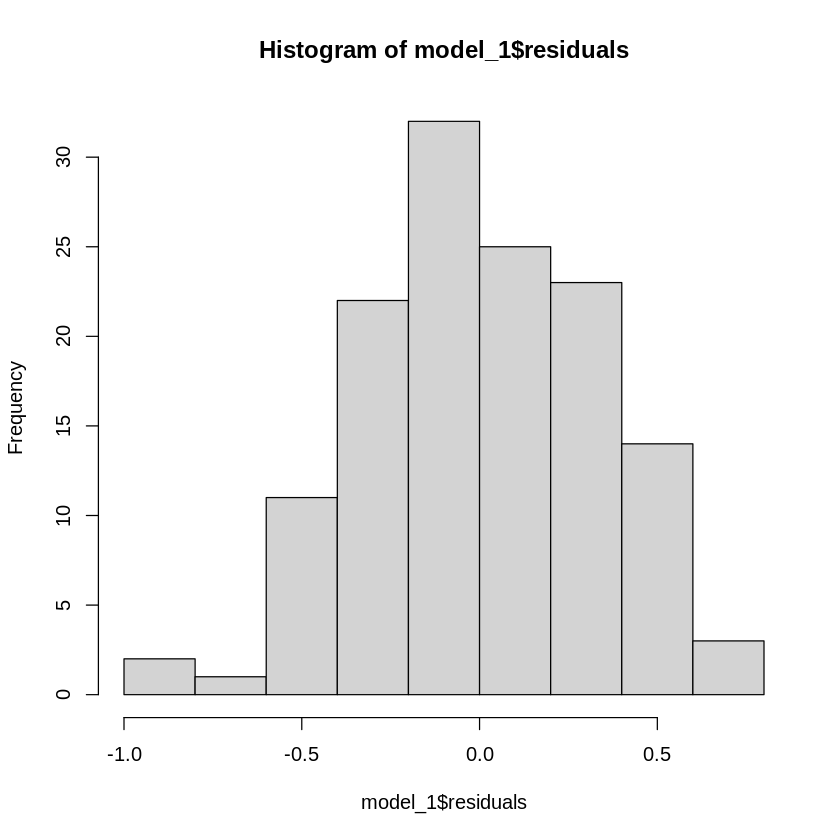

In [ ]:
hist(model_1$residuals)

In [ ]:
lmmodel <- lm(mpg ~ disp+hp+am, data=mtcars)

In [ ]:
bptest(lmmodel, ~ disp*hp*am + I(disp^2) + I(hp^2)+ I(am^2), data = mtcars)

In [ ]:
bptest(model, ~ lwage + I(lwage^2), data = wage1)

In [ ]:
bptest(model_1, data = OLS,  ~ hsGPA * ACT * skipped * pc + I(hsGPA^2)+ I(ACT^2)+ I(skipped^2)+ I(pc^2))


	studentized Breusch-Pagan test

data:  model_1
BP = 22.295, df = 18, p-value = 0.2191


We cannot reject the null hypothesis of homoscedasticity.

# Problem 2

 Does mother's smoking have a negative impact on birth weight?

A

In [ ]:
Birth <- read.csv("/content/BirthWt.csv")

In [ ]:
print(head(Birth))

  X X1 X1_8 X1_7 X1_6 X1_5 X1_4 X1_3 X1_2 X1_1    LogBW Mother_CigPerDay Order
1 1  1    1    1    1    1    1    1    1    1 4.691348                0     1
2 2  2    2    2    2    2    2    2    2    2 4.897840                0     2
3 3  3    3    3    3    3    3    3    3    3 4.941642                0     2
4 4  4    4    4    4    4    4    4    4    4 4.795791                0     2
5 5  5    5    5    5    5    5    5    5    5 4.859812                0     2
6 6  6    6    6    6    6    6    6    6    6 4.890349                0     1
  Male FatherEducation MotherEducation FamilyIncome
1    1              12              12         13.5
2    1              14              12         27.5
3    0              16              14         65.0
4    0              12              17         27.5
5    0              16              18         37.5
6    1              16              15         27.5


In [ ]:
model_2a <- lm(data = Birth, formula = LogBW ~ Mother_CigPerDay + Order + Male)

In [ ]:
summary(model_2a)


Call:
lm(formula = LogBW ~ Mother_CigPerDay + Order + Male, data = Birth)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20776 -0.08770  0.01602  0.11209  0.83901 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.7494529  0.0125918 377.186  < 2e-16 ***
Mother_CigPerDay -0.0055344  0.0009409  -5.882 5.39e-09 ***
Order             0.0136545  0.0061261   2.229   0.0260 *  
Male              0.0250753  0.0106819   2.347   0.0191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1761 on 1085 degrees of freedom
Multiple R-squared:  0.03912,	Adjusted R-squared:  0.03646 
F-statistic: 14.72 on 3 and 1085 DF,  p-value: 2.109e-09


The analysis indicates that the variable CigPerDay is statistically significant and exhibits a negative correlation with the dependent variable. Specifically, as the value of CigPerDay increases, the birth weight decreases, revealing a clear negative impact of smoking on birth weight.

In [ ]:
shapiro.test(model_2a$residuals)


	Shapiro-Wilk normality test

data:  model_2a$residuals
W = 0.91836, p-value < 2.2e-16


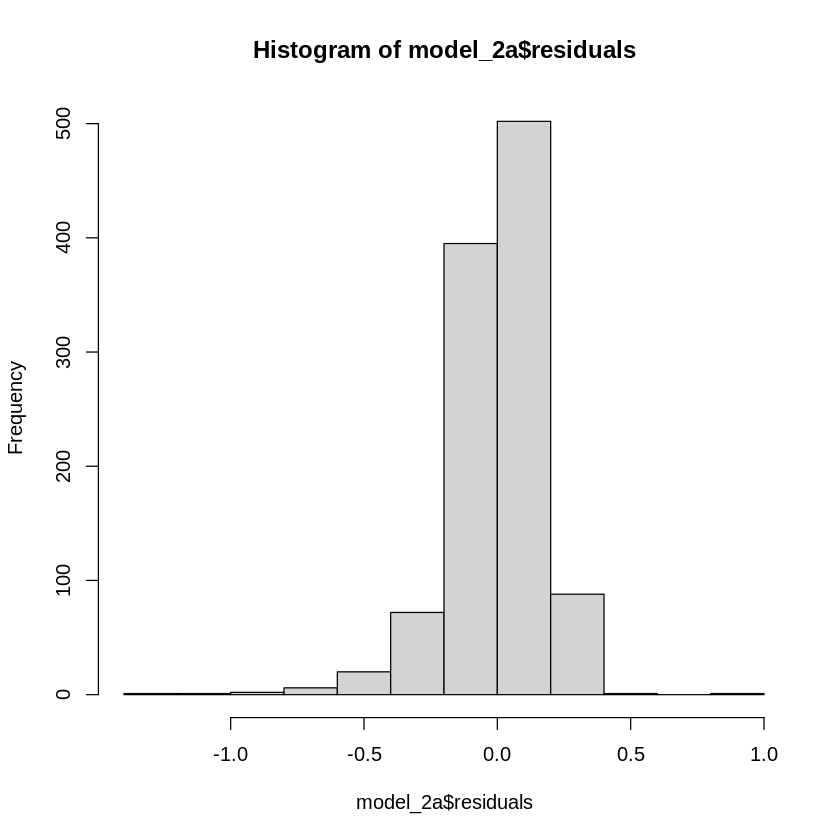

In [ ]:
hist(model_2a$residuals)

Although the model has been developed, it is not ideal as we have evidence to reject the hypothesis that the residuals follow a normal distribution.

## b

Using MotherEducation as an instrumental variable.

In [ ]:
model_2b <- lm(data = Birth, formula = LogBW ~ Mother_CigPerDay + Order + Male |MotherEducation)

In [ ]:
summary(model_2b)


Call:
lm(formula = LogBW ~ Mother_CigPerDay + Order + Male | MotherEducation, 
    data = Birth)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21758 -0.08158  0.01456  0.11742  0.82919 

Coefficients: (1 not defined because of singularities)
                                                      Estimate Std. Error
(Intercept)                                           4.772931   0.005438
Mother_CigPerDay + Order + Male | MotherEducationTRUE       NA         NA
                                                      t value Pr(>|t|)    
(Intercept)                                             877.8   <2e-16 ***
Mother_CigPerDay + Order + Male | MotherEducationTRUE      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1794 on 1088 degrees of freedom
